In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [67]:
# Read the CSV file with a semicolon delimiter
employment_df = pd.read_csv('indemployment-eng.csv')

In [68]:

# Remove commas from all columns
employment_df['2019'] = employment_df['2019'].str.replace(',', '').astype(float)
employment_df['2020'] = employment_df['2020'].str.replace(',', '').astype(float)
employment_df['2021'] = employment_df['2021'].str.replace(',', '').astype(float)
employment_df['2022'] = employment_df['2022'].str.replace(',', '').astype(float)
employment_df['2023'] = employment_df['2023'].str.replace(',', '').astype(float)



In [69]:
# look for missing values
def process_employment_df(df,row_slice_beg,row_slice_end):
    df1=df.iloc[row_slice_beg:row_slice_end]
    df_latest=df1.drop(columns=['Indigenous group 1'])
    df_final=df_latest.rename(columns={'Unnamed: 1':'Industries'})
    return df_final

ind_em_df = process_employment_df(employment_df,1, 17)
nonind_em_df = process_employment_df(employment_df,18, 34)

In [70]:
# Set the style of the plot

def bars_employment(df):
    sns.set_style("whitegrid")
    
    # Extract industries and select employment data for the year 2023
    industries = df['Industries']
    years = df.columns[1:] 
    
 # Melt the DataFrame to have a tidy format for Seaborn
    melted_df = df.melt(id_vars='Industries', var_name='Year', value_name='Employment')
    
    # Set figure size
    plt.figure(figsize=(10, 6))
    
    # Create a bar plot using Seaborn
    sns.barplot(data=melted_df, x='Year', y='Employment', hue='Industries')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Add title and adjust layout
    plt.title('Employment by Industry Over Years')
    plt.tight_layout()
    
    # Show the plot
    plt.show()

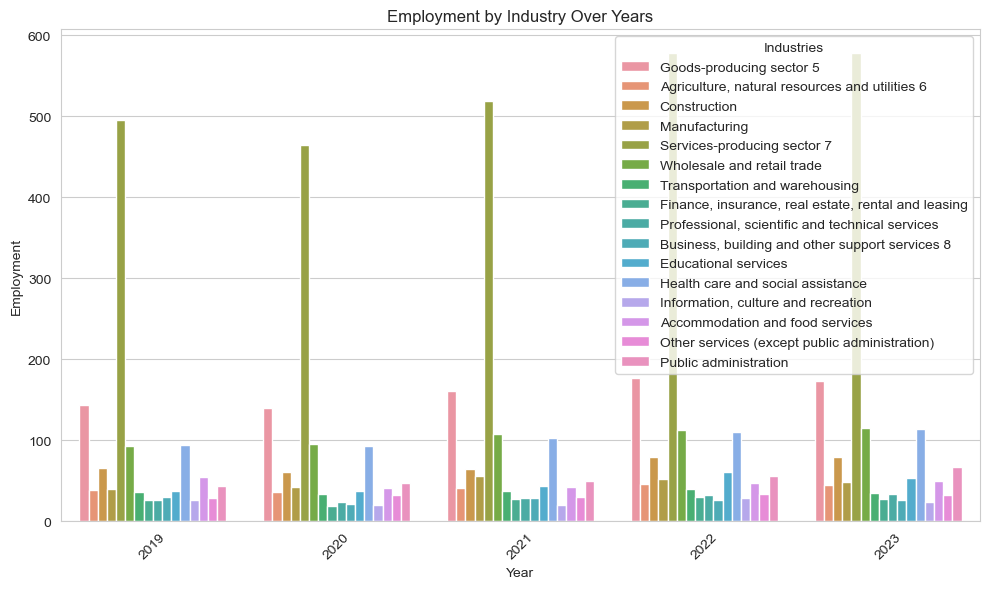

In [71]:
bars_employment(ind_em_df)

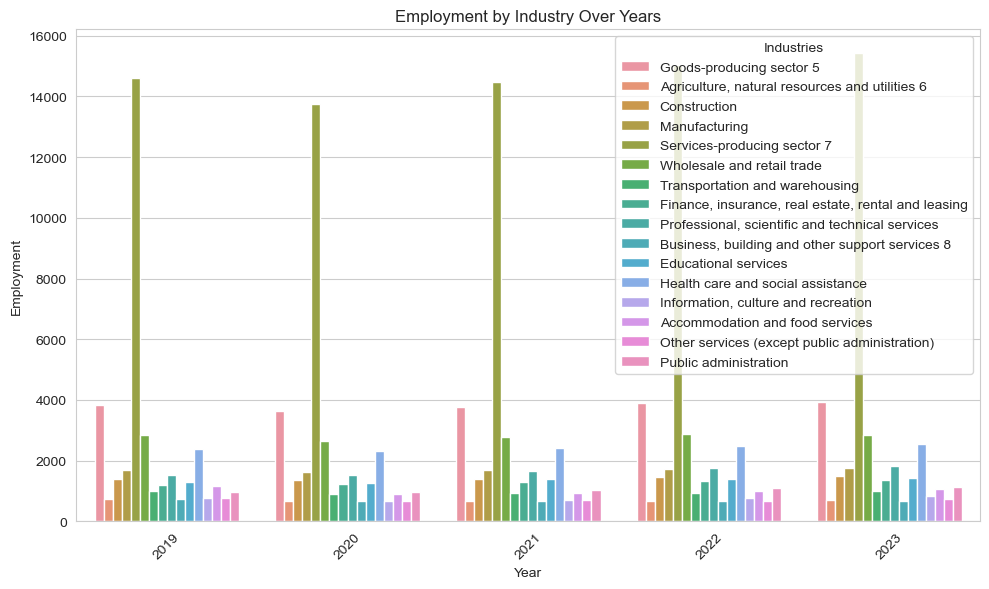

In [72]:
bars_employment(nonind_em_df)

In [73]:
nonind_em_df

,Industries,2019,2020,2021,2022,2023
18,Goods-producing sector 5,3835.7,3648.4,3757.9,3884.9,3947.9
19,"Agriculture, natural resources and utilities 6",720.5,679.8,679.4,685.5,689.8
20,Construction,1409.9,1347.5,1387.5,1473.8,1501.7
21,Manufacturing,1705.2,1621.1,1691.0,1725.7,1756.5
22,Services-producing sector 7,14623.0,13750.3,14467.7,15021.9,15437.9
23,Wholesale and retail trade,2840.3,2660.5,2773.0,2862.2,2850.0
24,Transportation and warehousing,994.9,909.8,948.1,945.5,984.0
25,"Finance, insurance, real estate, rental and le...",1211.6,1215.4,1291.5,1334.5,1360.6
26,"Professional, scientific and technical services",1526.3,1529.1,1646.9,1769.1,1832.9
27,"Business, building and other support services 8",734.0,664.3,653.5,667.2,661.7


In [74]:
ind_em_df

,Industries,2019,2020,2021,2022,2023
1,Goods-producing sector 5,143.5,139.8,160.4,176.6,172.8
2,"Agriculture, natural resources and utilities 6",38.5,36.1,40.7,45.9,45.4
3,Construction,65.2,60.8,64.2,79.1,79.5
4,Manufacturing,39.9,42.9,55.5,51.7,47.9
5,Services-producing sector 7,495.8,464.4,518.7,578.1,577.6
6,Wholesale and retail trade,93.3,95.6,107.4,112.1,115.3
7,Transportation and warehousing,36.6,33.4,37.8,40.3,35.5
8,"Finance, insurance, real estate, rental and le...",25.7,19.5,28.0,29.4,27.7
9,"Professional, scientific and technical services",25.9,23.4,28.5,32.5,33.1
10,"Business, building and other support services 8",29.9,21.4,28.7,26.9,26.3


In [75]:
# Assuming the first column is the column you want to set as the index for nonind_proportions DataFrame
nonind_em_df.set_index(nonind_em_df.columns[0], inplace=True)
# Assuming the first column is the column you want to set as the index for ind_proportions DataFrame
ind_em_df.set_index(ind_em_df.columns[0], inplace=True)


In [76]:
nonind_em_df

,2019,2020,2021,2022,2023
Industries,,,,,
Goods-producing sector 5,3835.7,3648.4,3757.9,3884.9,3947.9
"Agriculture, natural resources and utilities 6",720.5,679.8,679.4,685.5,689.8
Construction,1409.9,1347.5,1387.5,1473.8,1501.7
Manufacturing,1705.2,1621.1,1691.0,1725.7,1756.5
Services-producing sector 7,14623.0,13750.3,14467.7,15021.9,15437.9
Wholesale and retail trade,2840.3,2660.5,2773.0,2862.2,2850.0
Transportation and warehousing,994.9,909.8,948.1,945.5,984.0
"Finance, insurance, real estate, rental and leasing",1211.6,1215.4,1291.5,1334.5,1360.6
"Professional, scientific and technical services",1526.3,1529.1,1646.9,1769.1,1832.9


In [77]:
# Calculate the total sum for each dataset
total_nonind_sum = nonind_em_df.sum().sum()  # Total sum of nonind_em_df including all columns
total_ind_sum = ind_em_df.sum().sum()        # Total sum of ind_em_df including all columns

# Calculate the proportions of each dataset
nonind_proportions = nonind_em_df / total_nonind_sum
ind_proportions = ind_em_df / total_ind_sum

In [78]:
ind_proportions

,2019,2020,2021,2022,2023
Industries,,,,,
Goods-producing sector 5,0.020931,0.020392,0.023397,0.025760,0.025205
"Agriculture, natural resources and utilities 6",0.005616,0.005266,0.005937,0.006695,0.006622
Construction,0.009510,0.008869,0.009364,0.011538,0.011596
Manufacturing,0.005820,0.006258,0.008095,0.007541,0.006987
Services-producing sector 7,0.072319,0.067739,0.075660,0.084324,0.084251
Wholesale and retail trade,0.013609,0.013945,0.015666,0.016351,0.016818
Transportation and warehousing,0.005339,0.004872,0.005514,0.005878,0.005178
"Finance, insurance, real estate, rental and leasing",0.003749,0.002844,0.004084,0.004288,0.004040
"Professional, scientific and technical services",0.003778,0.003413,0.004157,0.004741,0.004828


In [102]:
# Extracting the x-axis labels (assuming they are the index of nonind_proportions dataframe)
def graph_proportions(df):
    # Area Chart
    df.plot(kind='area', figsize=(10, 6))
    plt.xlabel('X Label')  
    plt.ylabel('Proportions')
    plt.title('Proportions Area Chart')
    plt.xticks(ticks=range(len(df.index)), labels=nonind_proportions.index, rotation=90)
    plt.legend(title='Columns', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


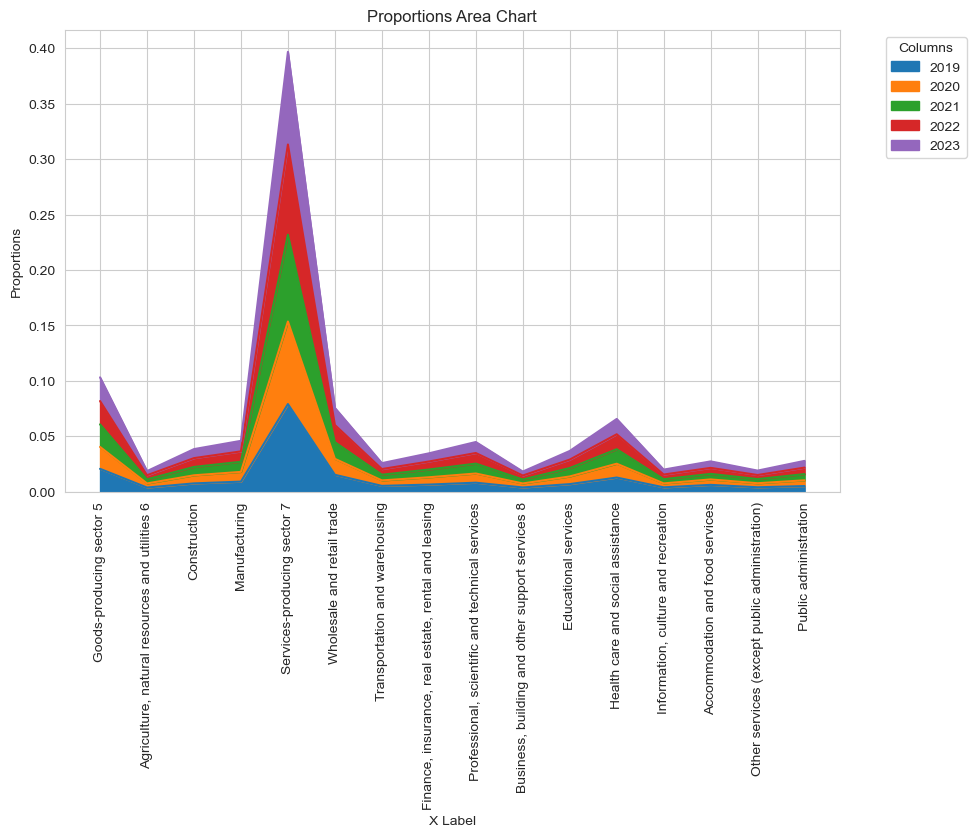

In [103]:
graph_proportions(nonind_proportions)


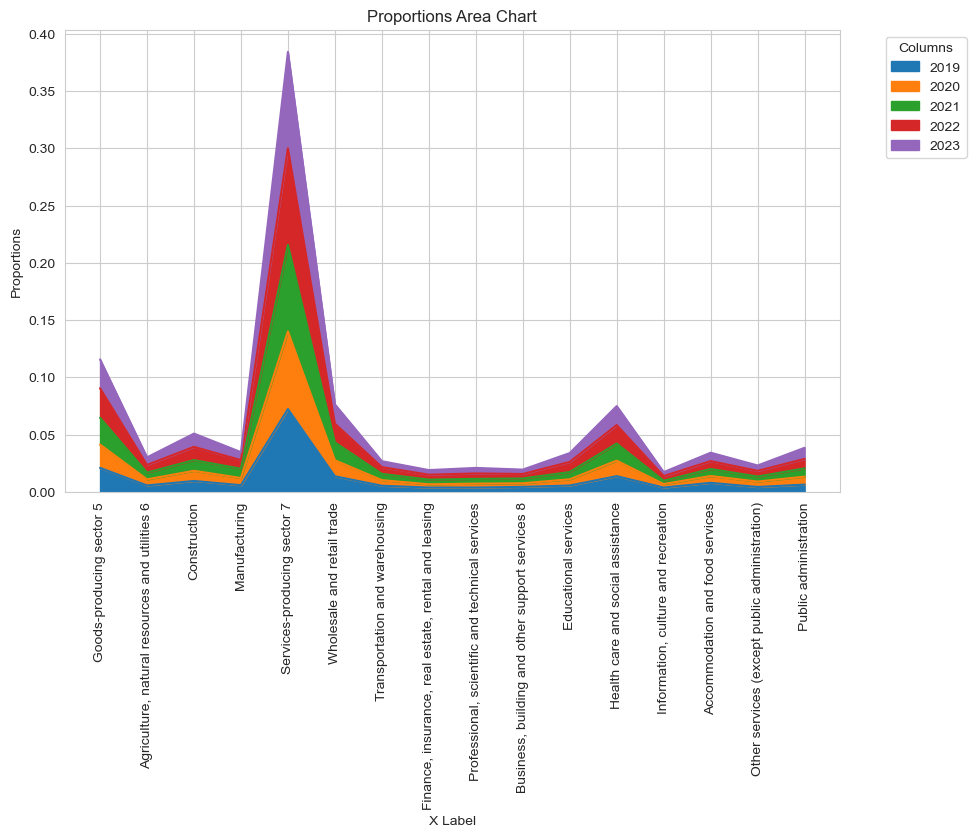

In [104]:
graph_proportions(ind_proportions)



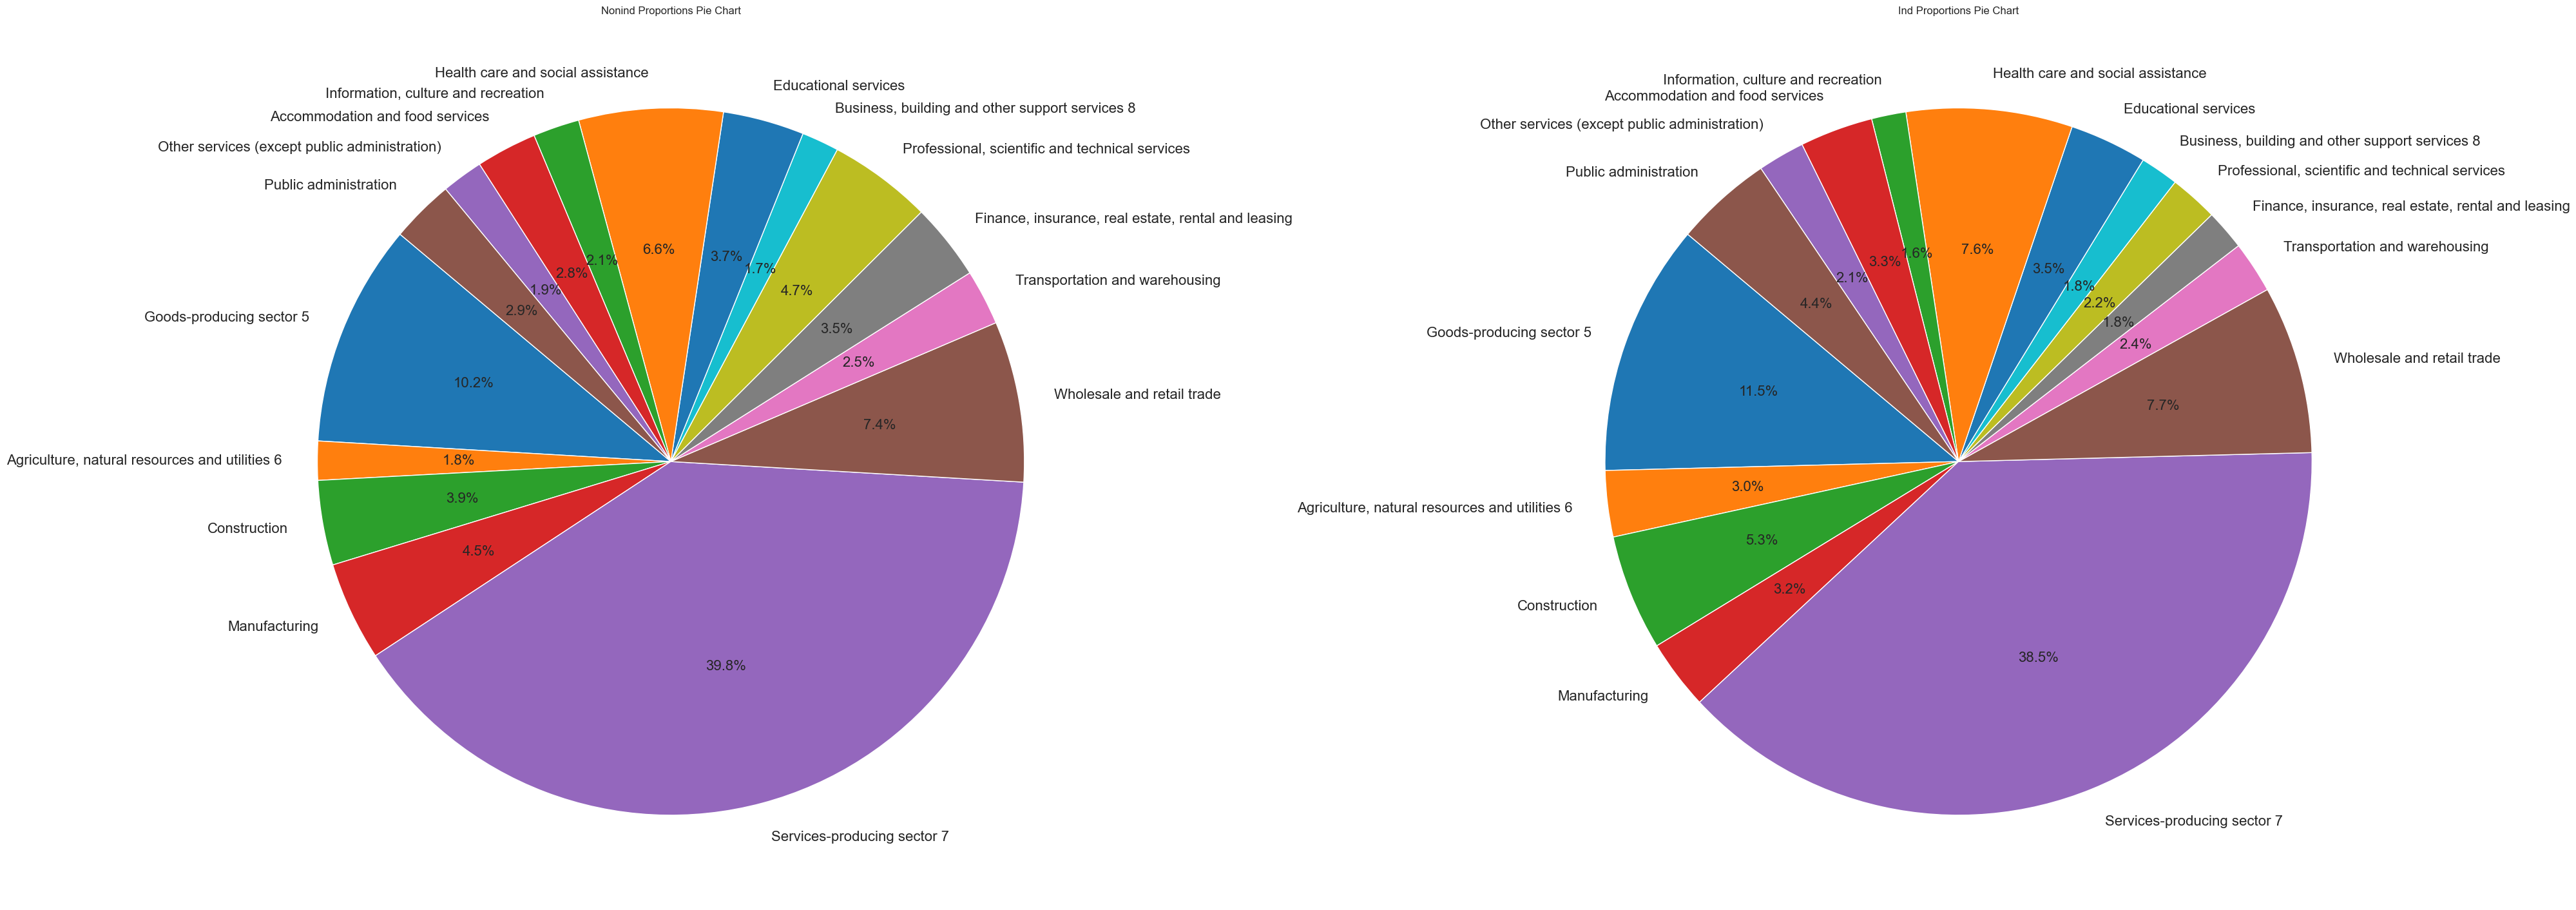

In [115]:
# Extracting proportions from the last column of the DataFrame
# Extracting proportions from the last column of each DataFrame
nonind_data = nonind_proportions.iloc[:, -1]
ind_data = ind_proportions.iloc[:, -1]

# Create a new figure and subplot
plt.figure(figsize=(40, 20))

# Plot the first pie chart for nonind_proportions
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.pie(nonind_data, labels=nonind_proportions.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 16})
plt.title('Nonind Proportions Pie Chart')

# Plot the second pie chart for ind_proportions
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.pie(ind_data, labels=ind_proportions.index, autopct='%1.1f%%',startangle=140, textprops={'fontsize': 16})
plt.title('Ind Proportions Pie Chart')

plt.tight_layout()  # Automatically adjust subplot parameters to give specified padding.
plt.show()
